<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2: Generate Descriptive Statistics and Visualizations

## For the "Median value of owner-occupied homes" provide a boxplot

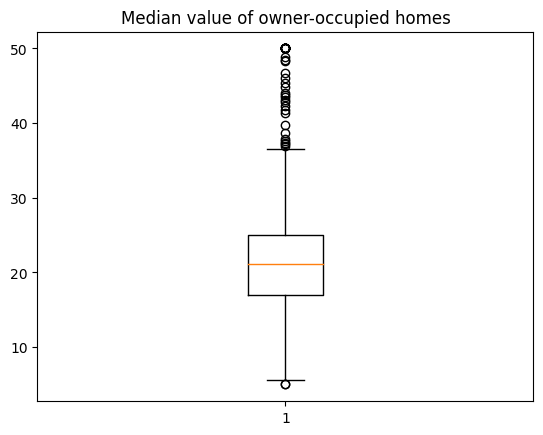

In [6]:
pyplot.boxplot(boston_df.MEDV)
pyplot.title('Median value of owner-occupied homes')
pyplot.show()

From the boxplot we can see that:
- Median values of of owner-occupied homes are within the range [$4000, $35000]
- 25% - 75% quantiles are ~$16000 - $25000
- median house price is ~$20000

## Provide a  bar plot for the Charles river variable

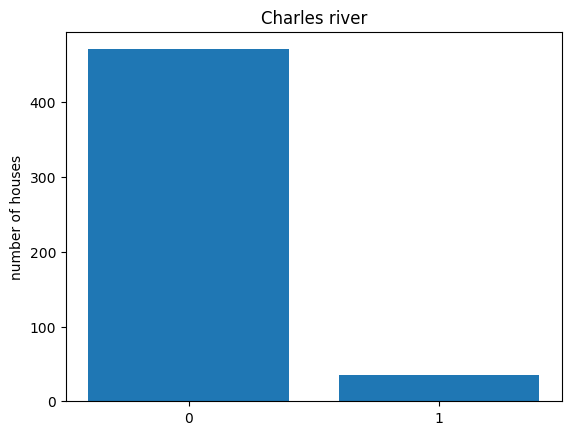

In [12]:
chas_count = boston_df.groupby('CHAS').size()
pyplot.bar(chas_count.index, chas_count)
pyplot.xticks(range(2), ['0','1'])
pyplot.ylabel('number of houses')
pyplot.title('Charles river')
pyplot.show()

Majority of the houses do not tract CHarles river

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

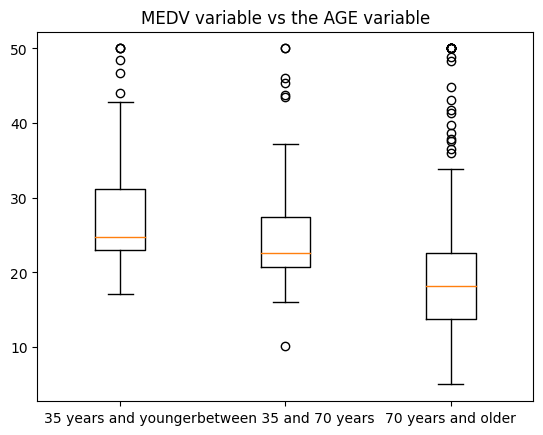

In [14]:
# create age_group
boston_df.loc[(boston_df.AGE<=35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df.AGE>35)&(boston_df.AGE<70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df.AGE>=70), 'age_group'] = '70 years and older'

pyplot.boxplot([boston_df[boston_df.age_group=='35 years and younger'].MEDV,
                boston_df[boston_df.age_group=='between 35 and 70 years'].MEDV,
                boston_df[boston_df.age_group=='70 years and older'].MEDV])
pyplot.xticks(range(1,4), ['35 years and younger', 'between 35 and 70 years', '70 years and older'])
pyplot.title('MEDV variable vs the AGE variable')
pyplot.show()

House prices tend to be lower with age. House price of group "70 years and older" has median of ~$19000

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

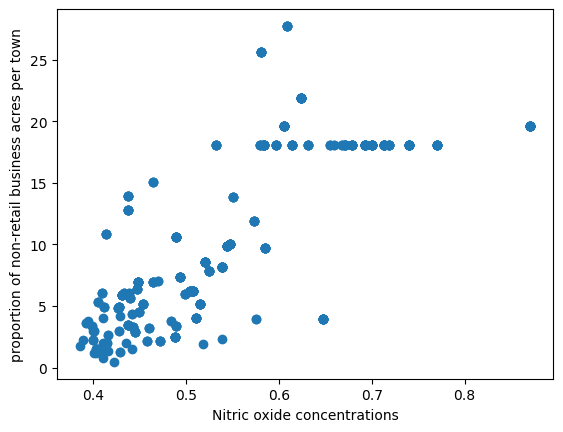

In [15]:
pyplot.scatter(boston_df['NOX'], boston_df['INDUS'])
pyplot.xlabel('Nitric oxide concentrations')
pyplot.ylabel('proportion of non-retail business acres per town')
pyplot.show()

There is a linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

## Create a histogram for the pupil to teacher ratio variable

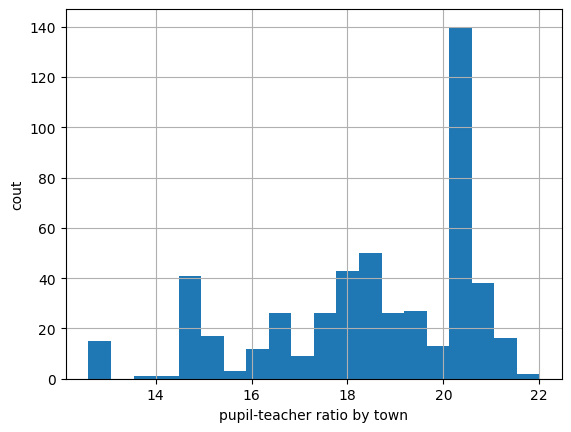

In [16]:
#  PTRATIO - pupil-teacher ratio by town
boston_df.PTRATIO.hist(bins=20)
pyplot.ylabel('cout')
pyplot.xlabel('pupil-teacher ratio by town')
pyplot.show()

The histogram is skewed to the right. THe most common ratio is around 20

# Task 3: Use the appropriate tests to answer the questions provided

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- H_0: There is no significant difference in means of median value of houses bounded by the Charles river or not
- H_1: There is a significant difference in means

In [24]:
# Using regression to do t-test for MEDV (dependent variable) and CHAS (independent veriable)
X = boston_df['CHAS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
pred = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           7.39e-05
Time:                        17:58:16   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: p < 0.05 there is evidence of difference in median value of houses bounded by the Charles river or not

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- H_0: There is no difference in Median values of houses (MEDV) for each age group
- H_1: There is at least a difference between age groups

In [23]:
# Using regression to do AVONA for MEDV and age_group
from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table) 

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


Conclusion: We reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- H_0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
- H_1: there is a relationship

In [21]:
X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
pred = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           7.91e-98
Time:                        17:51:40   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: we reject the null hypothesis as p-value is smaller than 0.05, there is arelationship between between Nitric oxide concentrations and proportion of non-retail business acres per town.
Correlation coeeficient is sqrt of R-squared = 0.76, i.e. the relationship is quite strong.

In [22]:
# using Pearson correlation
X = boston_df['NOX']
y = boston_df['INDUS']
scipy.stats.pearsonr(X,y)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

We can see same results as using OLS regression previously

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

- H_0: there is no correlation between additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
- H_1: there is a correlation

In [26]:
# using t-test regression
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        17:59:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: we reject the null hypothesis as p-value is smaller than 0.05, there is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.